# MUSHROOMS DATASET PROJECT

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('mushrooms.csv')

In [3]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
data.shape

(8124, 23)

In [5]:
#ALl the variables are in string format. Convert categorical variables to integer using label encoder
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()

In [6]:
for col in data.columns:
    data[col]=lbl.fit_transform(data[col])    

In [7]:
#check the data after label encoding
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [8]:
#split the x and y variables
y=data['class']
x=data.iloc[:,1:23]

In [9]:
#check shape of new variables
x.shape

(8124, 22)

In [10]:
y.shape

(8124,)

In [11]:
#check data
x.head

<bound method NDFrame.head of       cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0             5            2          4        1     6                1   
1             5            2          9        1     0                1   
2             0            2          8        1     3                1   
3             5            3          8        1     6                1   
4             5            2          3        0     5                1   
...         ...          ...        ...      ...   ...              ...   
8119          3            2          4        0     5                0   
8120          5            2          4        0     5                0   
8121          2            2          4        0     5                0   
8122          3            3          4        0     8                1   
8123          5            2          4        0     5                0   

      gill-spacing  gill-size  gill-color  stalk-shape  ...  \
0     

In [12]:
y.head

<bound method NDFrame.head of 0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int32>

In [14]:
#First normalise the data using StandardScalar so that 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [17]:
#see the Standardised data
print(x)

[[ 1.02971224  0.14012794 -0.19824983 ... -0.67019486 -0.5143892
   2.03002809]
 [ 1.02971224  0.14012794  1.76587407 ... -0.2504706  -1.31310821
  -0.29572966]
 [-2.08704716  0.14012794  1.37304929 ... -0.2504706  -1.31310821
   0.86714922]
 ...
 [-0.8403434   0.14012794 -0.19824983 ... -1.50964337 -2.11182722
   0.28570978]
 [-0.21699152  0.95327039 -0.19824983 ...  1.42842641  0.28432981
   0.28570978]
 [ 1.02971224  0.14012794 -0.19824983 ...  0.16925365 -2.11182722
   0.28570978]]


In [18]:
#using principal component analysis
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x)

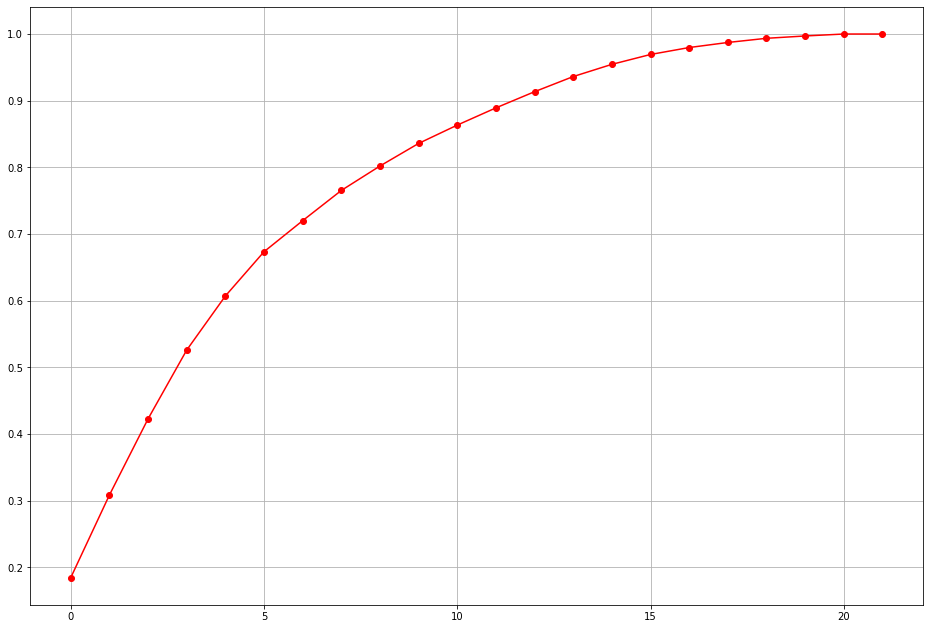

In [16]:
#plot a Scree plot of the Principal Components
plt.figure(figsize=(16,11))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()

In [32]:
#separate the train and test data
from sklearn.model_selection import train_test_split

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 6)

In [35]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(6093, 22)
(6093,)
(2031, 22)
(2031,)


In [36]:
#using Logistic regression to build the first model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_predict =lr.predict(x_test)

In [38]:
lr_predict_prob = lr.predict_proba(x_test)

In [39]:
print(lr_predict)
print(lr_predict_prob[:,1])

[0 1 0 ... 1 0 1]
[3.66374424e-02 8.61402670e-01 8.96650989e-05 ... 9.99979451e-01
 1.12643030e-02 9.99999774e-01]


In [62]:
mapping = list()
encoder = LabelEncoder()
for column in range(len(data.columns)):
    data[data.columns[column]]=encoder.fit_transform(data[data.columns[column]])
    mapping_dict={index:label for index, label in enumerate(encoder.classes_)}
    mapping.append(mapping_dict)

In [64]:
y= data['class']
x= data.drop('class',axis=1)

In [67]:
scaler= StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 6)

In [71]:
x_test.shape

(2031, 22)

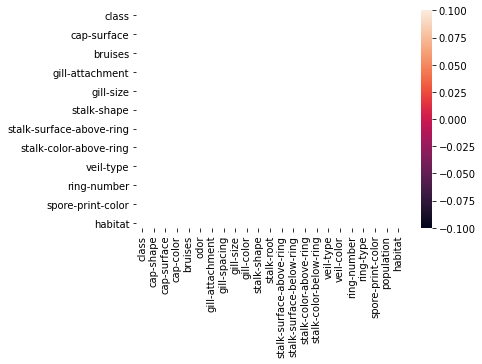

In [73]:
corr=data.corr()
sns.heatmap(corr)